In [ ]:
import numpy as np
from PIL import Image
from numpy import linalg as lin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

Path = "/content/drive/MyDrive/Face Recognition" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Non-Face**

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.CIFAR10(
    root="data",
    download=True,
    transform=ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data


Imported a non-face dataset, CIFAR10 from the pytorch framework.


In [ ]:
training_data.data.shape
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

import numpy as np
indices=np.random.choice(5000,400,replace=False)

samples=np.array([resize(rgb2gray(img.reshape(32,32,3)),(92,112)) for img in training_data.data[indices,:,:,:]])

we take 200 of the 5000 images at random 
from our dataset to put in our indices array. We then turn it to grayscale 
using rgb2gray, and resize it to the size of the given dataset. The for loop 
iterates over all the images.

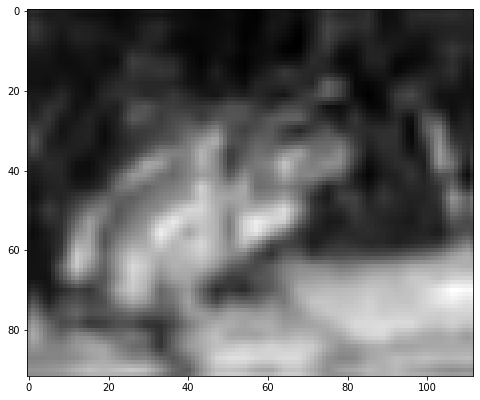

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(samples[19],cmap='gray')
plt.show()

In [ ]:
samples=samples.reshape(400,-1)

Reshape non-faces samples array for consistency, and we then 
concatenate it to our original dataset. We also create a labels array that 
consists of 400 ones (demonstrating the ‘faces’ data) and 200 zeroes 
(representing the non-faces images).

# **Face**

In [ ]:
image = Image.open(f"{Path}/s1/1.pgm")
Data = np.asarray(image).flatten()

for i in range(1,41) :
    for j in range(1,11) :
        if i == 1 and j==1 :  
            continue 
        image = Image.open(f"{Path}/s{i}/{j}.pgm")
        Matrix = np.asarray(image).flatten()
        Data = np.vstack((Data, Matrix))

In [ ]:
Y=np.concatenate((np.ones(400),np.zeros(400)))

In [ ]:
Data=np.concatenate((Data,samples),axis=0)
Data.shape

(800, 10304)

In [ ]:
Data_Test=np.array(Data[0])
Data_Train=np.array(Data[1])

Y_Test=np.array(Y[0])
Y_Train=np.array(Y[1])

Bonus = False 
for i in range (2,800):
    if Bonus :
        if i % 10 < 7 :
            Data_Train = np.vstack((Data_Train, Data[i])) 
            Y_Train = np.append(Y_Train,Y[i])
        else :
            Data_Test = np.vstack((Data_Test, Data[i])) 
            Y_Test = np.append(Y_Test,Y[i])
    else :
        if i % 2 == 0 :
            Data_Test = np.vstack((Data_Test, Data[i])) 
            Y_Test = np.append(Y_Test,Y[i])
        else :
            Data_Train = np.vstack((Data_Train, Data[i])) 
            Y_Train = np.append(Y_Train,Y[i])

Split data and proceed to apply the PCA and LDA algorithms as 
shown before

In [ ]:
print(Y_Train)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
Mean = np.mean(Data_Train,axis=0)
Centered = Data_Train - Mean
Cov = np.cov(Centered,bias=True,rowvar=False)
Temp_EigenValues , Temp_EigenVectors = lin.eigh(Cov)
EigenValues = np.diag(Temp_EigenValues)
EigenVectors=Temp_EigenVectors.T[::-1]

In [ ]:
Alpha =[0.8,0.85,0.9,0.95]
R=[0,0,0,0]
Sum = np.sum(Temp_EigenValues)
Total = 0 
index =  0
FR = 0
# print(Temp_EigenValues.size)
for i in range (Temp_EigenValues.size-1,-1,-1):
    Total = Total + Temp_EigenValues[i]
    FR = Total/Sum
    if ( FR >= Alpha[index] ):
        R[index]= Temp_EigenValues.size-i
        index = index + 1
        if index == 4  :
            break
print(R)

[1, 2, 5, 24]


In [ ]:
def knn(X_train, X_test, y_train, y_test,k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_predict) * 100
    return accuracy

Accuracy for r=1 k=1: 100.0 %
Accuracy for r=1 k=2: 100.0 %
Accuracy for r=1 k=3: 100.0 %
Accuracy for r=1 k=4: 100.0 %
Accuracy for r=1 k=5: 100.0 %
Accuracy for r=1 k=6: 100.0 %
Accuracy for r=1 k=7: 100.0 %
-----------------------------------


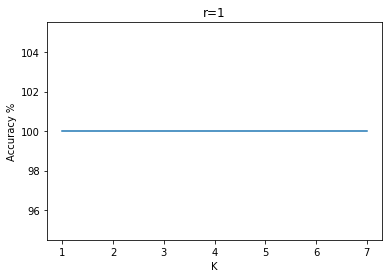

-----------------------------------
Accuracy for r=2 k=1: 100.0 %
Accuracy for r=2 k=2: 100.0 %
Accuracy for r=2 k=3: 100.0 %
Accuracy for r=2 k=4: 100.0 %
Accuracy for r=2 k=5: 100.0 %
Accuracy for r=2 k=6: 100.0 %
Accuracy for r=2 k=7: 100.0 %
-----------------------------------


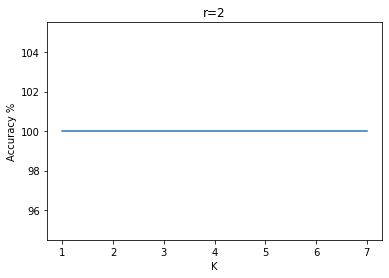

-----------------------------------
Accuracy for r=5 k=1: 100.0 %
Accuracy for r=5 k=2: 100.0 %
Accuracy for r=5 k=3: 100.0 %
Accuracy for r=5 k=4: 100.0 %
Accuracy for r=5 k=5: 100.0 %
Accuracy for r=5 k=6: 100.0 %
Accuracy for r=5 k=7: 100.0 %
-----------------------------------


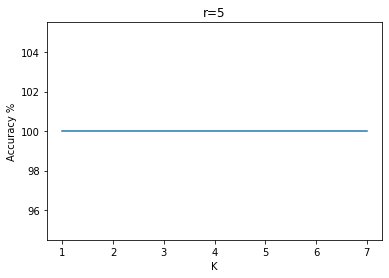

-----------------------------------
Accuracy for r=24 k=1: 100.0 %
Accuracy for r=24 k=2: 100.0 %
Accuracy for r=24 k=3: 100.0 %
Accuracy for r=24 k=4: 100.0 %
Accuracy for r=24 k=5: 100.0 %
Accuracy for r=24 k=6: 100.0 %
Accuracy for r=24 k=7: 100.0 %
-----------------------------------


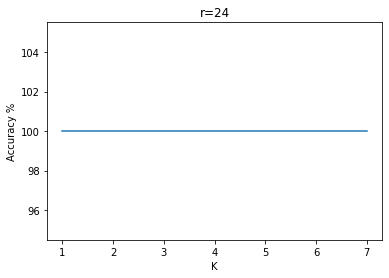

-----------------------------------


In [ ]:
Ks= [1,2,3,4,5,6,7]
for i in range(len(R)):
  Proj=EigenVectors[:R[i]]
  Reduced_Data_Train = np.dot(Data_Train,Proj.T)
  Reduced_Data_Test = np.dot(Data_Test,Proj.T)

  r_accuracies=[]
  for k in Ks:
    accuracy=knn(Reduced_Data_Train,Reduced_Data_Test,Y_Train,Y_Test,k)
    r_accuracies.append(accuracy)
    print(f'Accuracy for r={R[i]} k={k}: {accuracy} %')
  print('-----------------------------------')
  plt.title(f'r={R[i]}')
  plt.xlabel('K')
  plt.ylabel('Accuracy %')
  plt.plot(Ks,r_accuracies)
  plt.show()
  print('-----------------------------------')

LDA

In [ ]:

Faces = Data_Train[0:200]
Non_Faces = Data_Train[200:400]
Mean_Faces= (np.mean(Faces,axis=0))[np.newaxis].T
Mean_NonFaces = (np.mean(Non_Faces,axis=0))[np.newaxis].T

H = np.transpose((Mean_Faces-Mean_NonFaces),axes=None)
B = np.dot((Mean_Faces-Mean_NonFaces),H)
print(B.shape)


(10304, 10304)


In [ ]:
Z_Faces =Faces-Mean_Faces.T
Z_NonFaces =Non_Faces-Mean_NonFaces.T
S1 = np.dot(Z_Faces.T,Z_Faces)
S2 = np.dot(Z_NonFaces.T,Z_NonFaces)
S = S1 + S2

In [ ]:
# nk = 5
# dataK = []
# if Bonus:
#     for i in range(0,560,7):
#         dataK.append(Data_Train[i:i+7])
# else:    
#     for i in range(0,400,5):
#         dataK.append(Data_Train[i:i+5])
# meanK = []
# for i in range(40):
#   meanK.append(np.mean(dataK[i],axis=0))
# Sb = np.zeros((10304,10304))
# for i in range(40):
#   Sk = meanK[i] - Mean
#   Sb += (nk*(np.dot(Sk,Sk.T)))


In [ ]:
# S = np.zeros((10304,10304))
# for i in range(40):
#   Z = dataK[i] - meanK[i]
#   Sk = np.dot(Z.T,Z)
#   S+= Sk

In [ ]:
Lda_EigenValues , Lda_EigenVectors = lin.eigh(np.dot(lin.inv(S),B))

Accuracy for k=1: 100.0 %
Accuracy for k=2: 100.0 %
Accuracy for k=3: 100.0 %
Accuracy for k=4: 100.0 %
Accuracy for k=5: 100.0 %
Accuracy for k=6: 100.0 %
Accuracy for k=7: 100.0 %


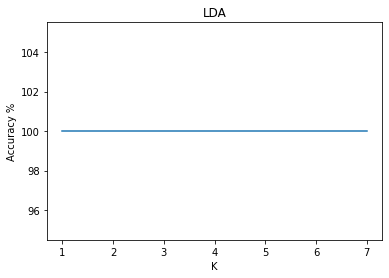

In [ ]:
Lda_EigenVectors_2 = Lda_EigenVectors.T[::-1]
Lda_EigenVectors_3 = Lda_EigenVectors_2[:40]


D_train_LDA_reduced=np.dot(Data_Train,Lda_EigenVectors_3.T)
D_test_LDA_reduced=np.dot(Data_Test,Lda_EigenVectors_3.T)
LDA_accuracies=[]
for k in Ks:
    accuracy=knn(D_train_LDA_reduced,D_test_LDA_reduced,Y_Train,Y_Test,k)
    LDA_accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy} %')
plt.title(f'LDA')
plt.xlabel('K')
plt.ylabel('Accuracy %')
plt.plot(Ks,LDA_accuracies)
plt.show()